## Support Vector Regression Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.shape

(244, 7)

In [7]:
print(df["sex"].value_counts())
print(df["smoker"].value_counts())
print(df["day"].value_counts())
print(df["time"].value_counts())

sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [8]:
## Feature Encoding(Label Encoding)

In [9]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
#nindepedndet fetaure and indepednet feature
x = df.drop('total_bill', axis =1)
y = df["total_bill"]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state = 42)

In [12]:
x_train

,tip,sex,smoker,day,time,size
115,3.50,Female,No,Sun,Dinner,2
181,5.65,Male,Yes,Sun,Dinner,2
225,2.50,Female,Yes,Fri,Lunch,2
68,2.01,Male,No,Sat,Dinner,2
104,4.08,Female,No,Sat,Dinner,2
...,...,...,...,...,...,...
106,4.06,Male,Yes,Sat,Dinner,2
14,3.02,Female,No,Sun,Dinner,2
92,1.00,Female,Yes,Fri,Dinner,2
179,3.55,Male,Yes,Sun,Dinner,2


In [13]:
# find binary features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
x_train['sex'] = encoder.fit_transform(x_train['sex'])
x_train['smoker'] = encoder1.fit_transform(x_train['smoker'])
x_train['time'] = encoder2.fit_transform(x_train['time'])

In [14]:
x_test['sex'] = encoder.transform(x_test['sex'])
x_test['smoker'] = encoder1.transform(x_test['smoker'])
x_test['time'] = encoder2.transform(x_test['time'])

In [15]:
## onehotencoding ----------------- ColumeTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [("onehot" , OneHotEncoder(drop = "first"),[3])]
                                        ,remainder = "passthrough")          

In [16]:
import sys
import numpy
numpy.set_printoptions(threshold = sys.maxsize)
x_train = ct.fit_transform(x_train)

In [17]:
x_test =ct.transform(x_test)

In [18]:
### SVR --- Support Vector Regression
from sklearn.svm import SVR
svr = SVR()

In [19]:
svr.fit(x_train,y_train)

SVR()

In [20]:
## Prediction
y_pred = svr.predict(x_test)

MEAN ABSOLUTE ERROR 4.463296539661225
R2 SCORE 0.49798620106004743


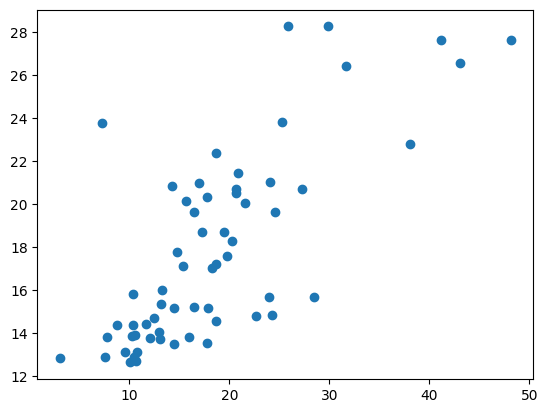

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MEAN ABSOLUTE ERROR", mae)
print("R2 SCORE",score)
plt.scatter(y_test,y_pred)

In [31]:
## HyperParamter Tuning using Randomized CV
param_grid = {
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf']  # Ensure correct format and no trailing commas
}

# Set up GridSearchCV
cv1 = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,  # Correctly specify param_grid as a keyword argument
    refit=True,
    verbose=3,
    cv=5,  # Number of folds in cross-validation (optional but recommended)
    scoring='neg_mean_squared_error'  # Scoring metric for regression (optional but recommended)
)

# Fit GridSearchCV
cv1.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", cv1.best_params_)
print("Best Score (MSE):", -cv1.best_score_)  

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..C=0.1, gamma=0.001, kernel=rbf;, score=-75.219 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.001, kernel=rbf;, score=-80.847 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=0.001, kernel=rbf;, score=-102.968 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.001, kernel=rbf;, score=-82.341 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.001, kernel=rbf;, score=-76.195 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.01, kernel=rbf;, score=-71.786 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.01, kernel=rbf;, score=-77.098 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.01, kernel=rbf;, score=-99.468 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.01, kernel=rbf;, score=-78.329 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.01, kernel=rbf;, score=-73.173 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.1, kernel=rbf;, score=-63.885 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.1, kernel=rbf;,

In [32]:
cv1_prediction = cv1.predict(x_test)

MEAN ABSOLUTE ERROR 4.260483973872268
R2 SCORE 0.5630727637616451


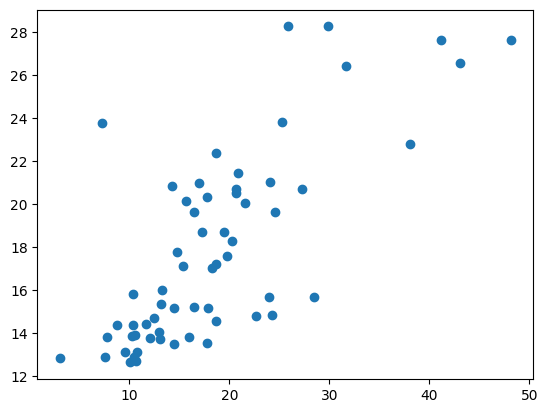

In [33]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test,cv1_prediction)
score = r2_score(y_test,cv1_prediction)
print("MEAN ABSOLUTE ERROR", mae)
print("R2 SCORE",score)
plt.scatter(y_test,y_pred)